In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os 
os.chdir("C:/Users/USER/Downloads")

In [186]:
dataset = pd.read_csv('E_Commerce_data.csv',index_col=0, encoding='ISO-8859-1')
df_sample = dataset.sample(frac=0.01, random_state=123)

In [187]:
df_sample.head(10)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
566985,22361,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,NaN,United Kingdom
552465,23209,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
577723,20727,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
548312,22804,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
576329,20840,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,NaN,United Kingdom
553886,23201,JUMBO BAG ALPHABET,10,5/19/2011 15:53,1.95,15648.0,United Kingdom
568715,22989,SET 2 PANTRY DESIGN TEA TOWELS,1,9/28/2011 16:07,3.25,17783.0,United Kingdom
548167,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,1,3/29/2011 13:45,4.13,NaN,United Kingdom
537915,22561,WOODEN SCHOOL COLOURING SET,12,12/09/2010 10:55,1.65,12797.0,Portugal


In [188]:
df_sample.shape

(5419, 7)

## REMOVING UNNECESSARIES COLUMNS
- STOCK CODE
- INVOICE NO
- ID

## CHECKING IF THE INVOICE NO IS CONSIDERED A INDEX INSTEAD COLUMN

In [189]:
print(df_sample.index.name) 

InvoiceNo


In [190]:
df_sample = df_sample.reset_index()

In [191]:
df_sample = df_sample.iloc[:, 2:]

In [192]:
df_sample = df_sample.reset_index(drop=True)

In [193]:
df_sample

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,NaN,United Kingdom
1,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
2,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
3,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
4,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,NaN,United Kingdom
...,...,...,...,...,...,...
5414,WOOD BLACK BOARD ANT WHITE FINISH,6,02/01/2011 11:20,6.45,12836.0,United Kingdom
5415,PINK KNITTED EGG COSY,6,03/08/2011 15:17,0.39,14426.0,United Kingdom
5416,NATURAL HANGING QUILTED HEARTS,12,9/30/2011 12:35,0.83,16729.0,United Kingdom
5417,CIRCUS PARADE LUNCH BOX,3,5/13/2011 16:19,3.29,NaN,United Kingdom


In [194]:
df_sample

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,NaN,United Kingdom
1,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
2,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
3,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
4,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,NaN,United Kingdom
...,...,...,...,...,...,...
5414,WOOD BLACK BOARD ANT WHITE FINISH,6,02/01/2011 11:20,6.45,12836.0,United Kingdom
5415,PINK KNITTED EGG COSY,6,03/08/2011 15:17,0.39,14426.0,United Kingdom
5416,NATURAL HANGING QUILTED HEARTS,12,9/30/2011 12:35,0.83,16729.0,United Kingdom
5417,CIRCUS PARADE LUNCH BOX,3,5/13/2011 16:19,3.29,NaN,United Kingdom


In [195]:
df_sample

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,NaN,United Kingdom
1,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
2,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
3,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
4,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,NaN,United Kingdom
...,...,...,...,...,...,...
5414,WOOD BLACK BOARD ANT WHITE FINISH,6,02/01/2011 11:20,6.45,12836.0,United Kingdom
5415,PINK KNITTED EGG COSY,6,03/08/2011 15:17,0.39,14426.0,United Kingdom
5416,NATURAL HANGING QUILTED HEARTS,12,9/30/2011 12:35,0.83,16729.0,United Kingdom
5417,CIRCUS PARADE LUNCH BOX,3,5/13/2011 16:19,3.29,NaN,United Kingdom


In [196]:
df_sample

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,NaN,United Kingdom
1,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
2,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
3,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
4,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,NaN,United Kingdom
...,...,...,...,...,...,...
5414,WOOD BLACK BOARD ANT WHITE FINISH,6,02/01/2011 11:20,6.45,12836.0,United Kingdom
5415,PINK KNITTED EGG COSY,6,03/08/2011 15:17,0.39,14426.0,United Kingdom
5416,NATURAL HANGING QUILTED HEARTS,12,9/30/2011 12:35,0.83,16729.0,United Kingdom
5417,CIRCUS PARADE LUNCH BOX,3,5/13/2011 16:19,3.29,NaN,United Kingdom


## PARAMETER INFO() TO CHECK IF THE VARIABLES TYPES ARE CORRECT.

In [197]:
df_sample

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,NaN,United Kingdom
1,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
2,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
3,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
4,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,NaN,United Kingdom
...,...,...,...,...,...,...
5414,WOOD BLACK BOARD ANT WHITE FINISH,6,02/01/2011 11:20,6.45,12836.0,United Kingdom
5415,PINK KNITTED EGG COSY,6,03/08/2011 15:17,0.39,14426.0,United Kingdom
5416,NATURAL HANGING QUILTED HEARTS,12,9/30/2011 12:35,0.83,16729.0,United Kingdom
5417,CIRCUS PARADE LUNCH BOX,3,5/13/2011 16:19,3.29,NaN,United Kingdom


In [198]:
df_sample.columns

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')

## DESCRIBE METHOD TO GENERATE DESCRIPTIVE STATISTICS AND TO CHECK HOW THE VALUES ARE DISTRIBUTED

In [199]:
df_sample.describe()

,Quantity,UnitPrice,CustomerID
count,5419.000000,5419.000000,4022.000000
mean,8.988928,3.693763,15305.944306
std,38.915710,10.011895,1718.125473
min,-1050.000000,0.000000,12347.000000
25%,1.000000,1.250000,13986.500000
50%,3.000000,2.100000,15163.500000
75%,10.000000,4.130000,16813.000000
max,1400.000000,416.750000,18287.000000


## CHECKING MISSING VALUES

In [200]:
print(df_sample.isnull().sum())

Description      18
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1397
Country           0
dtype: int64


In [201]:
mode_value = df_sample['Description'].mode()[0]
print(mode_value)

REGENCY CAKESTAND 3 TIER


## REPLACING THE VALUES WITH THE MODE


In [202]:
df_sample['Description'].fillna(mode_value, inplace=True)

In [203]:
df_sample['CustomerID'].fillna(-1, inplace=True)

In [204]:
print(df_sample.isnull().sum())

Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [205]:
df_sample

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,GLASS JAR DAISY FRESH COTTON WOOL,1,9/16/2011 10:42,5.79,-1.0,United Kingdom
1,LUNCH BAG DOILEY PATTERN,10,05/09/2011 15:17,1.65,16242.0,United Kingdom
2,LUNCH BAG BLACK SKULL.,2,11/21/2011 12:36,1.65,16713.0,United Kingdom
3,CANDLEHOLDER PINK HANGING HEART,4,3/30/2011 12:12,2.95,16059.0,United Kingdom
4,FRENCH FLORAL CUSHION COVER,3,11/14/2011 15:22,3.29,-1.0,United Kingdom
...,...,...,...,...,...,...
5414,WOOD BLACK BOARD ANT WHITE FINISH,6,02/01/2011 11:20,6.45,12836.0,United Kingdom
5415,PINK KNITTED EGG COSY,6,03/08/2011 15:17,0.39,14426.0,United Kingdom
5416,NATURAL HANGING QUILTED HEARTS,12,9/30/2011 12:35,0.83,16729.0,United Kingdom
5417,CIRCUS PARADE LUNCH BOX,3,5/13/2011 16:19,3.29,-1.0,United Kingdom


In [ ]:
print(df_sample.dtypes())
print(df_sample.iloc[0])

## PLOTTING GRAPH TO FIND ANY RELATIONSHIP BETWEEN VARIABLES

<AxesSubplot:>

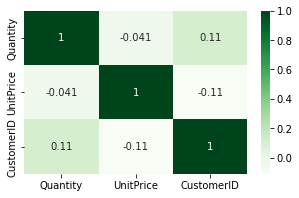

In [212]:
plt.figure(figsize=(5,3))
sns.heatmap(df_sample.corr(),annot=True, cmap="Greens")

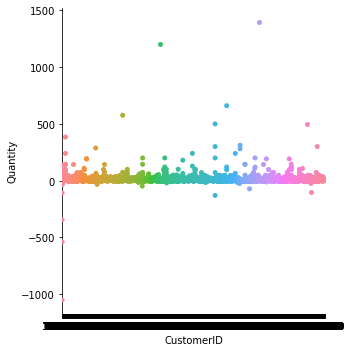

In [206]:
sns.catplot(x="CustomerID", y="Quantity", data=df_sample)

<AxesSubplot:>

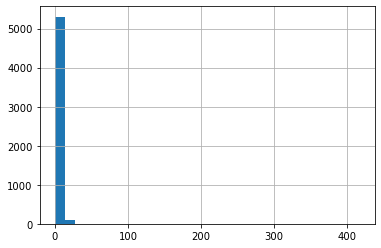

In [208]:
df_sample['UnitPrice'].hist(bins=30)

## FUNCAO TO CALCULATE THE LIMITS

In [218]:
def limit(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitud = q3 - q1
    return q1 - 1.5 * amplitud, q3 + 1.5 * amplitud
    

In [245]:
def remove_outliers(df_sample,column_name):
    qty_rows = df_sample.shape[0] #just rows [0]
   
    lim_inf, lim_sup = limit(df_sample[column_name])
    
    df_sample = df_sample.loc[(df_sample[column_name] >= lim_inf) & (df_sample[column_name]<= lim_sup), :]
    remove_rows = qty_rows - df_sample.shape[0] 
    return df_sample, remove_rows

In [263]:
def box_diagram(column):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=column,ax=ax1)
    ax2.set_xlim(limit(column))
    sns.boxplot(x=column, ax=ax2)
def histogram_plot(column):
    plt.figure(figsize=(15,5))
    sns.distplot(column,hist=True)
def barchart_plot (column):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(limit(column))

## QUANTITY COLUMN ANALYSE

In [246]:
df_sample, qty_rows = remove_outliers(df_sample, 'Quantity')
print ('{} linhas removidas na Quantity_column'.format(qty_rows))

544 linhas removidas na Quantity_column


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


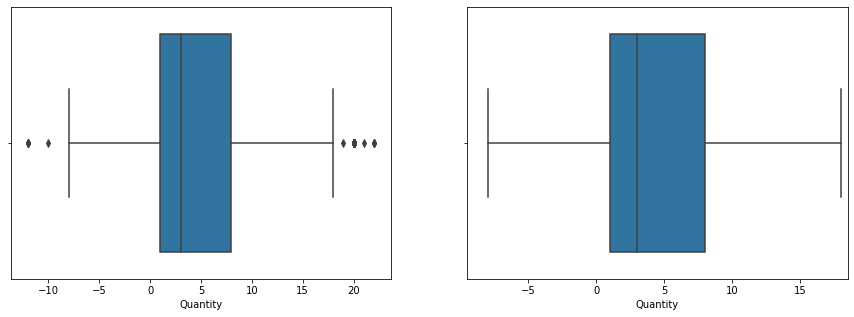

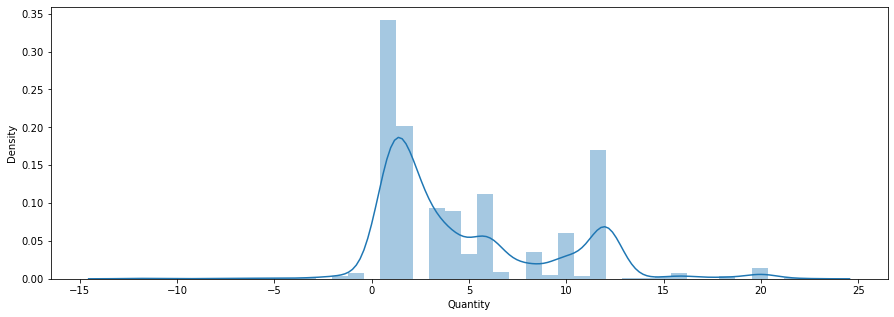

In [249]:
box_diagram(df_sample['Quantity'])
histogram_plot(df_sample['Quantity'])
#NESSE CASO ESTAMOS AVALIANDO UM BOX PLOT COM OUTLIERS E OUTRO SEM O OUTLIER CONFORME O CALCULO DE LIMITES


In [250]:
print(df_sample.shape)

(4552, 6)


## OUR INTENTION IS TO PREDICT WHAT ARE THE MOST SOLD ITEMS IN THE E-COMMERCE
- SO WE HAVE TO EXCLUDE THE SUPERIOR LIMIT AND INFERIOR LIMIT

## UNIT PRICE COLUMN ANYLSE


In [247]:
df_sample, qty_rows = remove_outliers(df_sample, 'UnitPrice')
print ('{} linhas removidas na UnitPrice'.format(qty_rows))

323 linhas removidas na UnitPrice


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


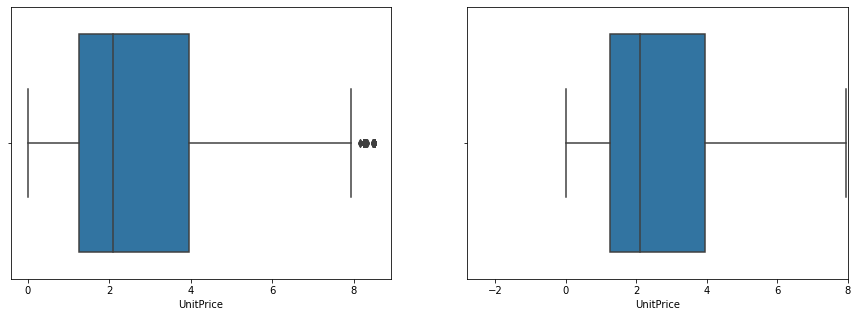

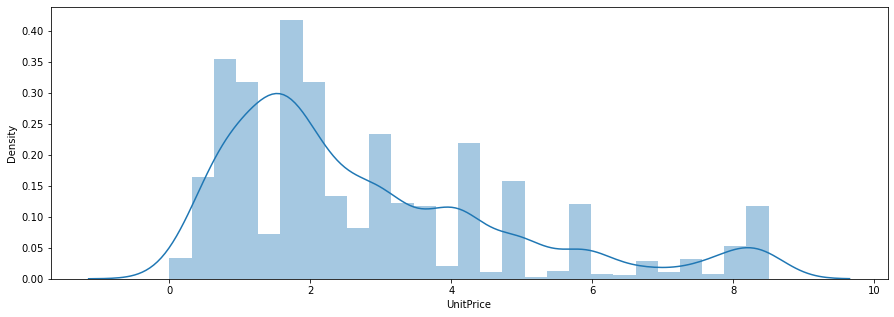

In [248]:
box_diagram(df_sample['UnitPrice'])
histogram_plot(df_sample['UnitPrice'])
#NESSE CASO ESTAMOS AVALIANDO UM BOX PLOT COM OUTLIERS E OUTRO SEM O OUTLIER CONFORME O CALCULO DE LIMITES


## COUNTRY COLUMN ANALYZE

In [252]:
df_sample['Country'].unique()

array(['United Kingdom', 'Portugal', 'Malta', 'Switzerland', 'Austria',
       'France', 'Belgium', 'Netherlands', 'Germany', 'EIRE', 'Spain',
       'Norway', 'Italy', 'Denmark', 'Australia', 'USA', 'Poland',
       'European Community', 'Cyprus', 'Sweden', 'Israel', 'Iceland',
       'Channel Islands', 'Unspecified', 'Finland', 'Brazil', 'Japan',
       'Canada'], dtype=object)

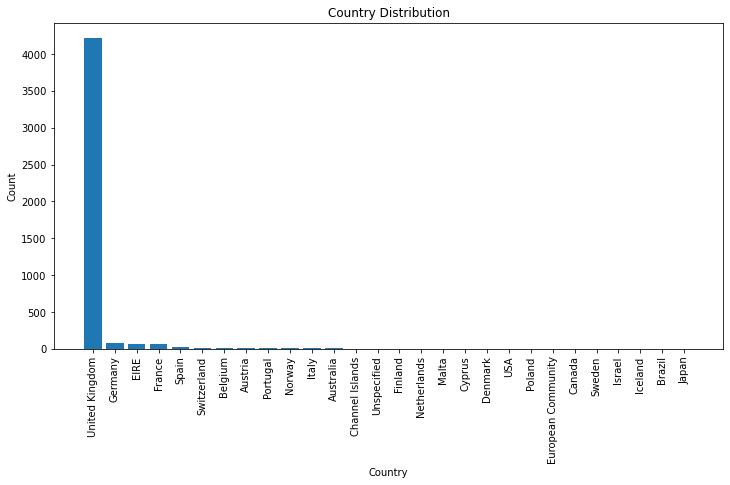

In [265]:
country_counts = df_sample['Country'].value_counts()

# create a bar chart using the counts data
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(country_counts.index, country_counts.values)

# set the title and labels for the chart
ax.set_title('Country Distribution')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# display the chart
plt.show()

## CATEGORICAL COLUMNS
- DESCRIPTION
- COUNTRY

In [266]:
print(df_sample['Description'].value_counts())

LUNCH BAG  BLACK SKULL.               23
WHITE HANGING HEART T-LIGHT HOLDER    23
ALARM CLOCK BAKELIKE GREEN            22
JUMBO BAG RED RETROSPOT               22
PAPER CHAIN KIT 50'S CHRISTMAS        19
                                      ..
NO JUNK MAIL METAL SIGN                1
CHRISTMAS HANGING TREE WITH BELL       1
VINTAGE GLASS COFFEE CADDY             1
PAPER LANTERN 5 POINT STAR MOON        1
NATURAL HANGING QUILTED HEARTS         1
Name: Description, Length: 1742, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


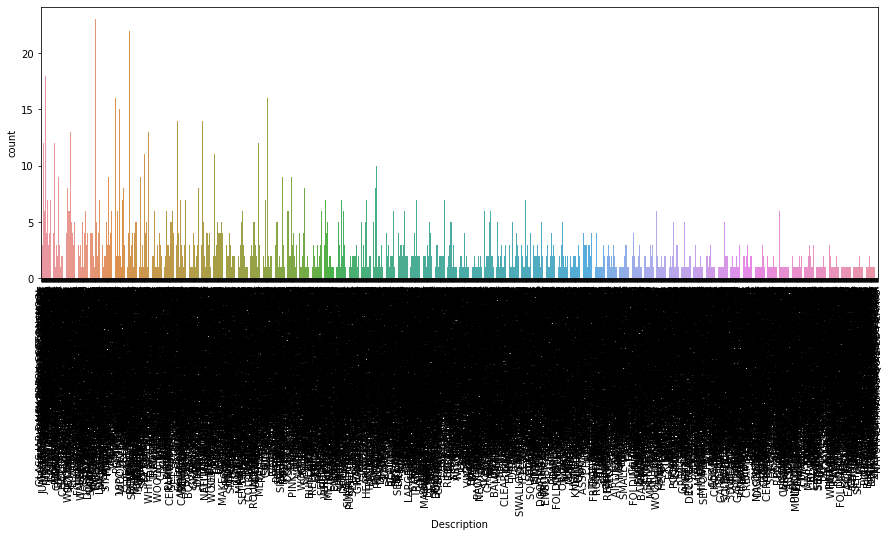

In [276]:
plt.figure(figsize=(15,5))
graph = sns.countplot('Description', data = df_sample)
graph.tick_params(axis='x', rotation=90)

In [282]:
table_types_products = df_sample['Description'].value_counts()
column_group = [] #list empty to group the irrelevants products 
for type in table_types_products.index:
    if table_types_products[type] <=2:
        column_group.append(type)
print(column_group)

for type in column_group:
    df_sample.loc[df_sample['Description']==type,'Description']= "Other"

['SET OF 36 TEATIME PAPER DOILIES', 'SET OF 6 STRAWBERRY CHOPSTICKS', 'EAU DE NIL LOVE BIRD CANDLE', 'VINTAGE CHRISTMAS STOCKING ', 'DECORATION WOBBLY RABBIT METAL ', 'BLACK HEART CARD HOLDER', 'DAISY GARDEN MARKER', 'SKULLS GREETING CARD', 'STORAGE TIN VINTAGE LEAF', 'CARD HOLDER LOVE BIRD LARGE ', '6 GIFT TAGS VINTAGE CHRISTMAS ', 'PIG KEYRING WITH LIGHT & SOUND ', 'ROSE CARAVAN DOORSTOP', 'RED RETROSPOT BUTTER DISH', 'WOODEN REGATTA BUNTING', 'GYMKHANA TREASURE BOOK BOX', 'RETROSPOT GIANT TUBE MATCHES', 'PACK OF SIX LED TEA LIGHTS', 'CHILDS GARDEN SPADE BLUE', 'SET OF 6 SNACK LOAF BAKING CASES', 'KINGS CHOICE TEA CADDY ', 'SET 12 COLOURING PENCILS DOILY', 'SET OF 4 KNICK KNACK TINS DOILY ', 'DOORMAT 3 SMILEY CATS', '200 RED + WHITE BENDY STRAWS', 'CHARLIE + LOLA BISCUITS TINS', 'CHILDRENS CUTLERY DOLLY GIRL ', 'VINTAGE  2 METRE FOLDING RULER', 'WHITE JEWELLED HEART DECORATION', 'SET OF 6 T-LIGHTS SNOWMEN', 'STAR WREATH DECORATION WITH BELL', 'BIRD DECORATION GREEN POLKADOT', 'FEATHE

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


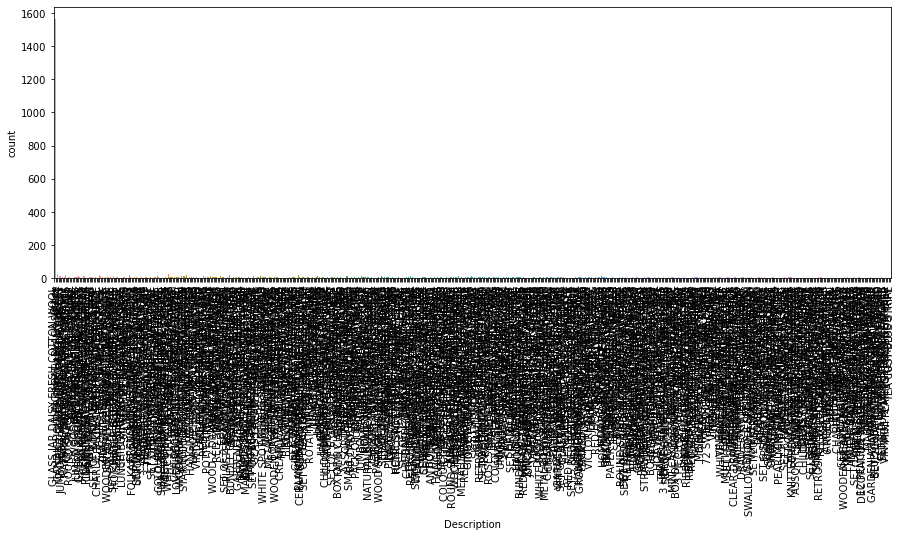

In [283]:
plt.figure(figsize=(15,5))
graph = sns.countplot('Description', data = df_sample)
graph.tick_params(axis='x', rotation=90)